In [54]:
%matplotlib inline

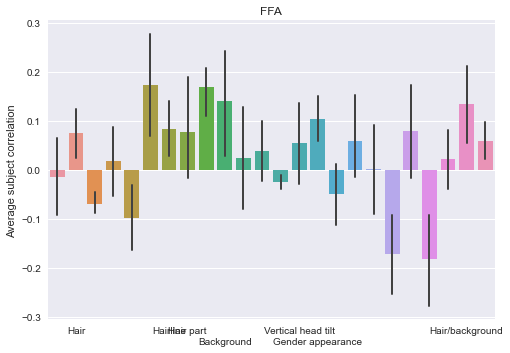

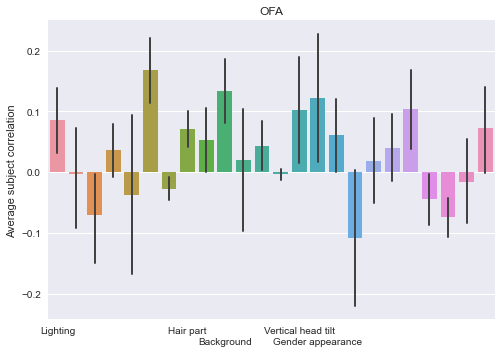

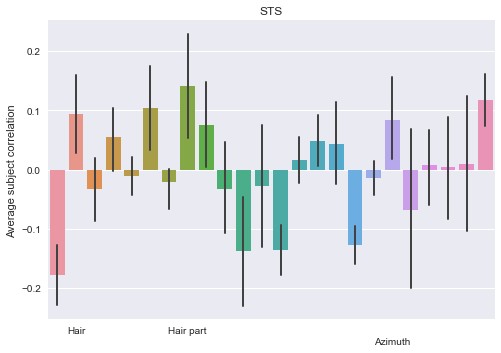

In [3]:
import os
import numpy as np
import glob
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('seaborn')

semantic_dimensions = [
    'Lighting',
    'Hair',
    'Hairstyle',
    '',
    'Hair',
    '',
    'Hairline',
    'Hair part',
    '',
    '\nBackground',
    'Smile',
    'Image tone',
    '\nSkintone',
    'Vertical head tilt',
    '\nGender appearance',
    '',
    '',
    'Lighting/azimuth',
    '\nAzimuth',
    '',
    '',
    '',
    'Hair/background',
    ''
]

encoding_corr_feat_dir = '../encoding_corr_feat'
SUBJECTS = np.arange(1,5)
ROIS = ['FFA', 'OFA', 'STS']
MODELS = ['factor_vae.latent_24.hyper_10.random_50751608.train_bias',
         'vae.latent_24.hyper_1.random_50639474.train_bias',
         'vgg.fc7.24.train_bias']
n_dimenions = 24

model = MODELS[0]
for roi in  ROIS:
    per_subject_latent_dim_corr = np.empty((4,24))
    for subject_i, subject in enumerate(SUBJECTS):
        encoding_corr_file = os.path.join(encoding_corr_feat_dir, 'subject_{}_roi_{}_model_{}.csv'.format(subject, roi, model))
        #print(encoding_corr_file)
        data = np.genfromtxt(encoding_corr_file, delimiter=',')
        latent_dim_corr = np.mean(data, axis=0)
        per_subject_latent_dim_corr[subject_i] = latent_dim_corr
    average_latent_dim_corr = np.mean(per_subject_latent_dim_corr, axis=0)
    roi_labels = np.array(semantic_dimensions.copy())
    roi_labels[average_latent_dim_corr < .05] = ''
    #plt.bar(np.arange(1,25), average_latent_dim_corr)
    #plt.show()
    #graph = sns.barplot(x=np.arange(1,25), y=average_latent_dim_corr, ci=68)
    data_frame = pd.DataFrame(per_subject_latent_dim_corr)
    graph = sns.barplot(data=data_frame, ci=68, errwidth=2)
    graph.set(title=roi, ylabel='Average subject correlation')
    graph.set_xticklabels(roi_labels)
    plt.show()